# 🧮 Dynamic Delta-Hedging Simulator

## 📘 Introduction

This notebook/script provides a **realistic, data-driven simulation** of delta-hedging an option portfolio using **live market data from the NSE (National Stock Exchange of India)**.  
It dynamically retrieves market prices, calibrates volatility, and performs **self-financing Black–Scholes-based replication** of both **Call** and **Put** options.

The tool serves as a **decision-support and educational model** for traders, quantitative analysts, and investors who want to understand:
- How **hedging reduces PnL volatility** by neutralizing directional risk (delta exposure),
- How **model assumptions** (e.g., volatility constancy, liquidity, continuous rebalancing) affect hedge performance, and
- How **discrete rebalancing frequency**, transaction costs, and volatility uncertainty impact real-world option strategies.

---

## 🎯 Purpose and Investment Relevance

**Key objective:**  
To demonstrate how delta-hedging — the cornerstone of options risk management — converts a directional bet into a volatility-managed position.

This simulation helps you:
- Quantify the **variance reduction** achieved by hedging.
- Visualize how **mark-to-market volatility** evolves over time.
- Identify **residual risks** (gamma, vega, theta) left after hedging.
- Build intuition for **pricing and replication** under the Black–Scholes framework.
- Evaluate the sensitivity of PnL outcomes to volatility assumptions, interest rates, and hedge frequency.

In practice, such models support:
- **Risk desk calibration** for hedging policies,  
- **Trading strategy design** for volatility arbitrage, and  
- **Investor education** for understanding option payoffs and hedging logic.

---

## ⚙️ What This Script Does

1. **Fetches live market data**
   - Uses [`nsepython`](https://github.com/NSEDownload/nsepython) to fetch the **NSE option chain** and **spot price**.
   - Automatically falls back to **Yahoo Finance** if NSE data is unavailable or rate-limited.

2. **Selects nearest expiry and ATM strike**
   - Automatically identifies the **closest upcoming expiry date**.
   - Chooses the **ATM (At-The-Money) strike** closest to the current spot.

3. **Calibrates volatility (σ)**
   - Uses **implied volatility** estimated from the live option mid-prices.
   - Falls back to **historical volatility** (from 6 months of Yahoo data) when implied vols are missing.

4. **Runs corrected, self-financing delta-hedge simulations**
   - Simulates both **Call** and **Put** options under **risk-neutral drift (r)**.
   - Applies the **correct self-financing rule**:
     \[
     \text{cash} = -C_0 - (\text{stock position} \times S_0)
     \]
   - Accrues interest on cash and adjusts hedge positions dynamically.

5. **Generates analytics and visualizations**
   - Produces **histograms** comparing unhedged vs. hedged terminal PnL.
   - Plots **mark-to-market volatility decay** over time.
   - Visualizes **Greek decay curves** (Delta, Vega, Theta) vs. days-to-expiry.

6. **Outputs results for further analysis**
   - Saves results as **CSV summaries** and **PNG plots**.
   - Creates a **textual summary** for each option (Call and Put) with an automatic interpretation section.

---

## 💡 Methodology Highlights

- **Self-Financing Portfolio**  
  Each hedge cycle maintains a balance:
  $
  \text{cash} + \text{stock} \times S_t + \text{option value} = \text{constant (no external funding)}
  $

  This ensures economic realism and eliminates artificial drifts in hedged PnL.

- **Risk-Neutral Simulation**  
  The stock price evolves under the **risk-free drift (r)**, consistent with **Black–Scholes replication**.  
  This centers the **hedged PnL distribution around zero**, as expected under a perfect continuous hedge.

- **Assumptions**
  - No transaction costs or liquidity constraints.
  - Continuous market prices and constant volatility.
  - No jumps or stochastic volatility.
  
  *In reality, discrete trading, slippage, and changing volatilities introduce residual “gamma” and “vega” PnL — extensions to model these can be easily added.*

---

## 🧾 Why This Matters

This simulator acts as a **learning bridge between theory and practice**:

| Concept | Illustrated By |
|----------|----------------|
| **Directional risk removal** | PnL variance drops after hedging |
| **Gamma PnL / Discrete rebalancing** | Residual fluctuations even after hedging |
| **Volatility risk (Vega)** | PnL changes when true vol ≠ assumed vol |
| **Time decay (Theta)** | Gradual erosion in long option positions |
| **Self-financing logic** | Realistic capital usage and hedge cash flow tracking |

Traders, risk managers, and students can use this as a **hands-on reference** for:
- Building **delta-neutral portfolios**,
- Testing **hedging efficiency**, and
- Understanding **model limitations** in option pricing.

---

## 🗂️ Outputs Generated

- `*_pnl_summary.csv` — Statistical summary (mean, std, median, min, max) for hedged/unhedged PnL  
- `*_pnl_hist.png` — Histogram comparing unhedged vs. delta-hedged terminal PnL  
- `*_pnl_std_over_time.png` — MTM volatility evolution over time  
- `*_greeks_decay.csv` — Delta, Vega, Theta decay curves  
- `*_greek_decay_[delta|vega|theta].png` — Visual plots of Greek decay  
- `*_text_summary.txt` — Textual summary + automatic interpretation

---

## ⚠️ Implementation Notes

- The hedging function uses a **self-financing start**:
  ```python
  cash = -C0 - stock_pos * S0

```
This prevents artificial large residuals that arise from non-self-financing hedges.

The simulation runs under risk-neutral drift (r), keeping the mean hedged PnL ≈ 0 if assumptions hold.

Transaction costs and liquidity constraints are not modeled, but can be added for realism.

If NSE data access is rate-limited or fails, the script automatically falls back to Yahoo Finance for spot and volatility estimation.

In [ ]:
!pip install nsepython yfinance matplotlib pandas numpy scipy --quiet


=== Running dynamic delta-hedge for M&M ===
Source: nse
Spot: 3606.00 | Expiry: 2025-10-28 (6 days) | ATM strike: 3600
Calibrated vols -> call σ: 0.1568 | put σ: 0.1854

--- Simulating CALL (ATM 3600) ---


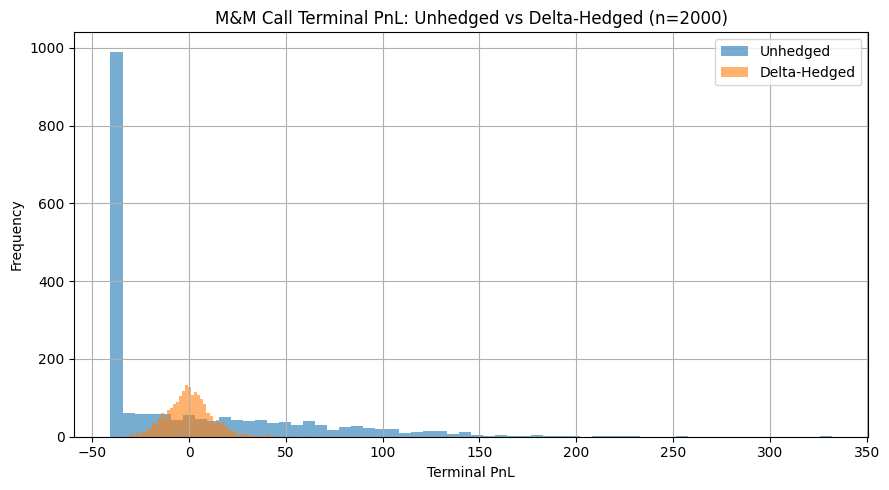

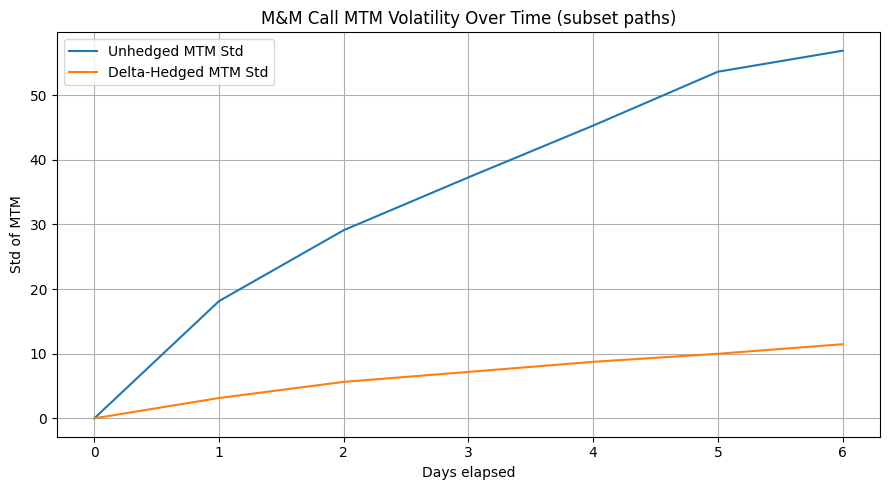

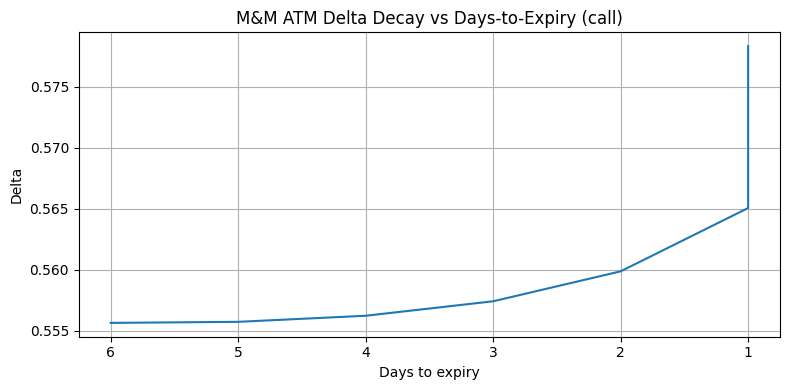

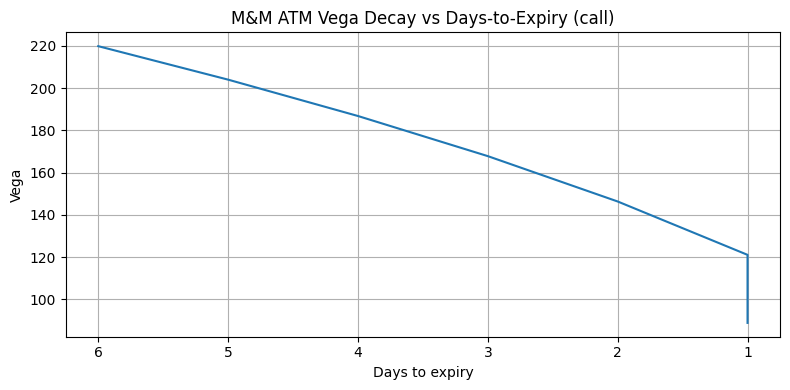

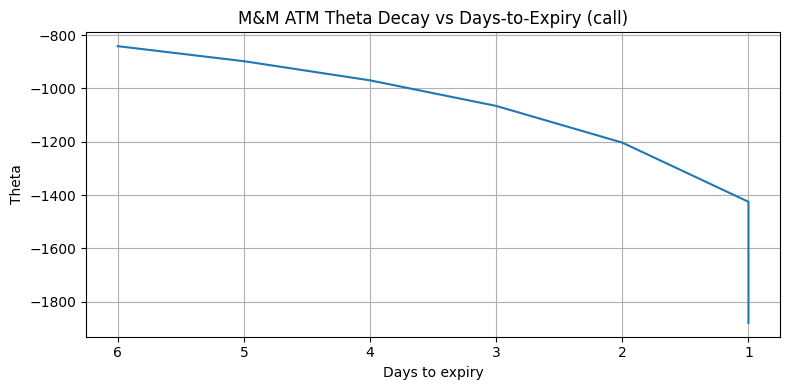

--- M&M CALL SUMMARY ---
Spot: 3606.00 | ATM: 3600 | Expiry: 2025-10-28 (6 days)
Calibrated sigma: 0.1568

Unhedged Terminal PnL: mean=-1.4006, std=54.7727, median=-33.5330
Hedged Terminal PnL:   mean=0.0061, std=11.6755, median=-0.2737
Hedge effect: PnL volatility reduced by ~4.69x

Interpretation:
- Delta-hedging neutralizes first-order directional risk (we expect a large STD drop).
- Residual PnL comes from discrete rebalancing (gamma PnL), vega risk (constant-sigma assumption),
  and unmodeled transaction/financing costs. Theta (time decay) remains for long option positions.
- Practical note: validate hedge frequency vs transaction costs; for ATM short-dated options gamma can be large.


--- Simulating PUT (ATM 3600) ---


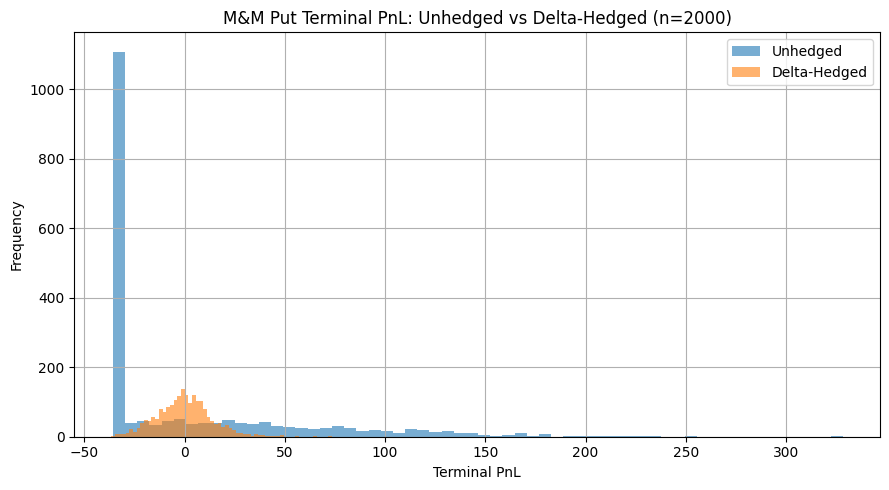

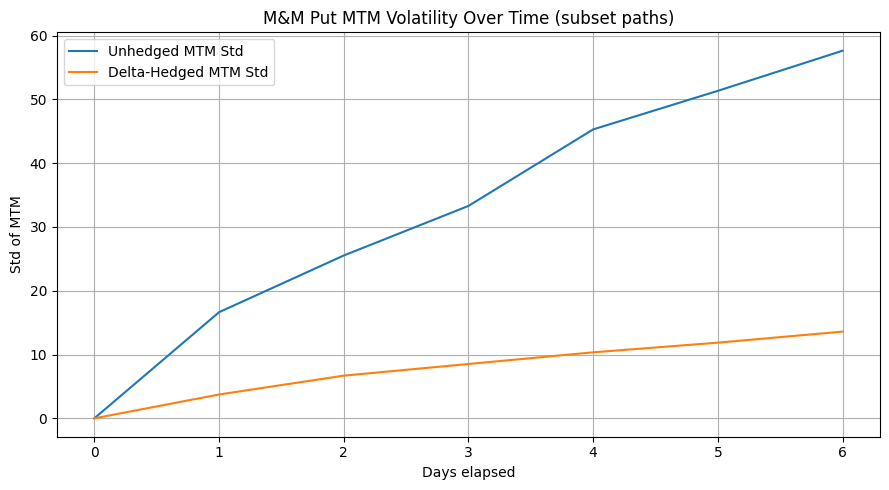

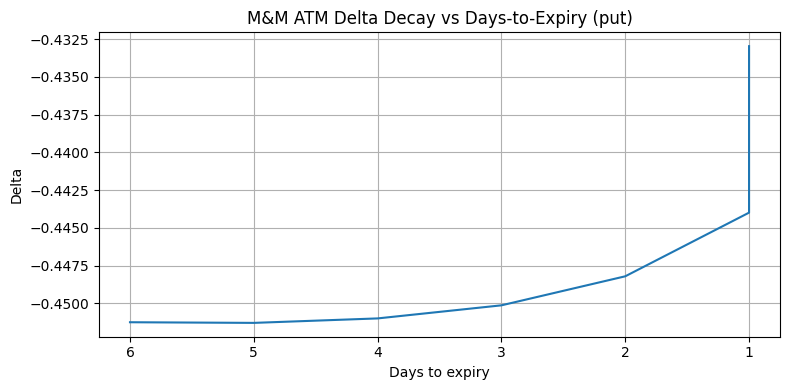

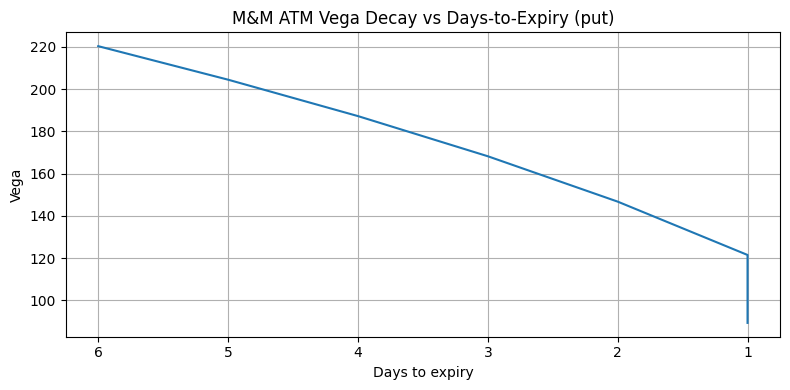

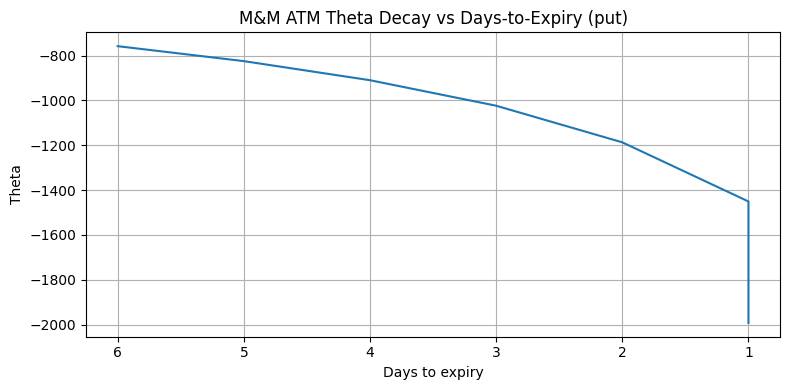

--- M&M PUT SUMMARY ---
Spot: 3606.00 | ATM: 3600 | Expiry: 2025-10-28 (6 days)
Calibrated sigma: 0.1854

Unhedged Terminal PnL: mean=1.3040, std=55.6776, median=-35.7500
Hedged Terminal PnL:   mean=0.0104, std=13.8545, median=-0.3414
Hedge effect: PnL volatility reduced by ~4.02x

Interpretation:
- Delta-hedging neutralizes first-order directional risk (we expect a large STD drop).
- Residual PnL comes from discrete rebalancing (gamma PnL), vega risk (constant-sigma assumption),
  and unmodeled transaction/financing costs. Theta (time decay) remains for long option positions.
- Practical note: validate hedge frequency vs transaction costs; for ATM short-dated options gamma can be large.


All outputs saved to /content/output_nse_fixed


In [7]:
"""
Dynamic NSE delta-hedge simulator (calls & puts)
- Uses nsepython for option chain & spot (Yahoo fallback)
- Auto ATM + nearest expiry
- Implied vol calibration with historical fallback
- Fixed self-financing delta-hedge simulation (correct trade signs)
- Outputs: CSVs, PNGs, and textual summaries with automatic interpretation

Dependencies:
pip install nsepython yfinance scipy pandas numpy matplotlib
"""
import os
import math
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
from nsepython import nse_optionchain_scrapper, nse_eq
import yfinance as yf

# ----------------------- CONFIG -----------------------
RISK_FREE_RATE = 0.06     # annual
TRADING_DAYS = 252
N_PATHS = 2000
SEED = 42
OUT_DIR = os.path.abspath("./output_nse_fixed")
os.makedirs(OUT_DIR, exist_ok=True)
np.random.seed(SEED)

# ------------------- BLACK-SCHOLES HELPERS -------------------
def bs_d1_d2(S, K, r, sigma, T):
    if T <= 0 or sigma <= 0:
        return None, None
    d1 = (np.log(S/K) + (r + 0.5*sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return d1, d2

def bs_price(S, K, r, sigma, T, option_type="call"):
    d1, d2 = bs_d1_d2(S, K, r, sigma, T)
    if d1 is None:
        return max(S - K, 0.0) if option_type == "call" else max(K - S, 0.0)
    if option_type == "call":
        return S * norm.cdf(d1) - K * math.exp(-r*T) * norm.cdf(d2)
    else:
        return K * math.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def implied_volatility(market_price, S, K, r, T, option_type="call"):
    def f(sig): return bs_price(S, K, r, sig, T, option_type) - market_price
    try:
        return brentq(f, 1e-6, 5.0, maxiter=200)
    except Exception:
        return np.nan

def bs_delta(S, K, r, sigma, T, option_type="call"):
    # supports scalar or numpy array S
    scalar = np.isscalar(S)
    if scalar:
        d1, _ = bs_d1_d2(S, K, r, sigma, T)
        if d1 is None:
            return 0.0
        return float(norm.cdf(d1)) if option_type == "call" else float(norm.cdf(d1) - 1.0)
    else:
        S = np.asarray(S, dtype=float)
        # vectorized d1 with safe handling
        tau = np.maximum(T, 1e-12)
        with np.errstate(divide='ignore', invalid='ignore'):
            d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
        d1 = np.nan_to_num(d1, nan=-10.0, posinf=10.0, neginf=-10.0)
        if option_type == "call":
            return norm.cdf(d1)
        else:
            return norm.cdf(d1) - 1.0

# ------------------- FIXED, SELF-FINANCING HEDGE SIM -------------------
def simulate_hedge_fixed(S0, K, sigma, r, T, option_type, n_paths=N_PATHS, trading_days=TRADING_DAYS, seed=SEED):
    """
    Returns:
      pnl_unhedged (n_paths,), pnl_hedged (n_paths,),
      mtm_unhedged (subset x (N+1)), mtm_hedged (subset x (N+1))
    """
    rng = np.random.default_rng(seed)
    N = max(1, int(round(T * trading_days)))   # daily steps approx
    dt = 1.0 / trading_days
    sqrt_dt = math.sqrt(dt)

    # initial option premium
    c0 = bs_price(S0, K, r, sigma, T, option_type)

    # simulate GBM under risk-free drift r (BS consistency)
    S = np.zeros((n_paths, N+1))
    S[:, 0] = S0
    for t in range(1, N+1):
        z = rng.standard_normal(n_paths)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * z * sqrt_dt)

    # payoff and unhedged pnl
    if option_type == "call":
        payoff = np.maximum(S[:, -1] - K, 0.0)
    else:
        payoff = np.maximum(K - S[:, -1], 0.0)
    pnl_unhedged = payoff - c0

    # --- Self-financing delta hedge initialization ---
    cash = np.zeros(n_paths, dtype=float)
    delta0 = bs_delta(S0, K, r, sigma, T, option_type)  # scalar
    stock_pos = np.full(n_paths, -delta0, dtype=float)  # short delta
    cash[:] = -c0 - stock_pos * S0                      # self-financing start: buy option, fund stock

    # record MTM for subset of paths
    subset = min(200, n_paths)
    mtm_unhedged = np.zeros((subset, N+1))
    mtm_hedged = np.zeros((subset, N+1))
    for i, idx in enumerate(range(subset)):
        mtm_unhedged[i, 0] = bs_price(S[idx, 0], K, r, sigma, T, option_type) - c0
        mtm_hedged[i, 0] = bs_price(S[idx, 0], K, r, sigma, T, option_type) + stock_pos[idx] * S[idx,0] + cash[idx]

    # previous delta array (per-path)
    delta_prev = np.full(n_paths, delta0, dtype=float)

    # rebalancing loop
    for t in range(1, N+1):
        tau = max((N - t) / trading_days, 1e-12)
        S_t = S[:, t]

        # accrue interest on cash
        cash *= math.exp(r * dt)

        # compute new deltas (vectorized)
        delta_new = bs_delta(S_t, K, r, sigma, tau, option_type)  # array

        # desired stock position per path (short delta_new)
        desired_stock = -delta_new
        # current stock_pos stored; compute trade (shares to buy positive, sell negative)
        trade = desired_stock - stock_pos  # positive -> buy shares (pay), negative -> sell (receive)
        # update cash for trades
        cash -= trade * S_t
        # update stock_pos and delta_prev
        stock_pos = desired_stock.copy()
        delta_prev = delta_new.copy()

        # record mtm for subset
        for i, idx in enumerate(range(subset)):
            mtm_unhedged[i, t] = bs_price(S[idx, t], K, r, sigma, tau, option_type) - c0
            mtm_hedged[i, t] = bs_price(S[idx, t], K, r, sigma, tau, option_type) + stock_pos[idx] * S[idx,t] + cash[idx]

    # final PnL (we still hold the option payoff)
    pnl_hedged = cash + stock_pos * S[:, -1] + payoff

    return pnl_unhedged, pnl_hedged, mtm_unhedged, mtm_hedged

# ------------------- DATA FETCH USING nsepython (Yahoo fallback) -------------------
def fetch_nse_chain(symbol):
    """
    Returns dict:
      source, spot, expiry_date, days_to_expiry, atm, call_mid, put_mid, raw
    """
    try:
        oc = nse_optionchain_scrapper(symbol)
        eq = nse_eq(symbol)
        spot = float(eq['priceInfo']['lastPrice'])
        expiry_list = oc['records']['expiryDates']
        # choose nearest expiry (first in list)
        expiry_date = dt.datetime.strptime(expiry_list[0], "%d-%b-%Y").date()
        days_to_expiry = (expiry_date - dt.date.today()).days
        data_rows = oc['records']['data']
        strikes = sorted({row['strikePrice'] for row in data_rows})
        atm = min(strikes, key=lambda x: abs(x - spot))
        atm_row = next((row for row in data_rows if row['strikePrice'] == atm), None)

        call_mid = None
        put_mid = None
        if atm_row:
            ce = atm_row.get('CE') or {}
            pe = atm_row.get('PE') or {}
            # compute mid where possible
            cbid, cask = ce.get('bidprice') or 0, ce.get('askPrice') or 0
            pbid, pask = pe.get('bidprice') or 0, pe.get('askPrice') or 0
            call_mid = (cbid + cask)/2 if (cbid and cask) else (ce.get('lastPrice') or None)
            put_mid  = (pbid + pask)/2 if (pbid and pask) else (pe.get('lastPrice') or None)

        return {
            "source": "nse",
            "spot": spot,
            "expiry_date": expiry_date,
            "days_to_expiry": days_to_expiry,
            "atm": atm,
            "call_mid": call_mid,
            "put_mid": put_mid,
            "raw": oc
        }
    except Exception as e:
        # fallback to Yahoo
        print(f"Warning: NSE fetch failed ({e}) — falling back to Yahoo Finance for spot & hist vol.")
        yf_ticker = symbol + ".NS"
        hist = yf.download(yf_ticker, period="1mo", progress=False)
        if hist is None or hist.empty:
            raise RuntimeError("Yahoo fetch failed as fallback.")
        spot = float(hist["Close"].iloc[-1])
        expiry_date = dt.date.today() + dt.timedelta(days=30)
        days_to_expiry = (expiry_date - dt.date.today()).days
        atm = round(spot / 50) * 50
        return {
            "source": "yahoo",
            "spot": spot,
            "expiry_date": expiry_date,
            "days_to_expiry": days_to_expiry,
            "atm": atm,
            "call_mid": None,
            "put_mid": None,
            "raw": None
        }

# ------------------- FULL WORKFLOW -------------------
def run_full(symbol):
    print(f"\n=== Running dynamic delta-hedge for {symbol} ===")
    info = fetch_nse_chain(symbol)
    spot = info["spot"]
    expiry_date = info["expiry_date"]
    days_to_expiry = info["days_to_expiry"]
    atm_strike = info["atm"]
    # Use trading-day convention for T
    T = max(days_to_expiry / TRADING_DAYS, 1.0 / TRADING_DAYS)

    # calibrate vols -> try implied ATM call & put mids, else fallback to historical vol (6mo)
    sigma_call = np.nan
    sigma_put = np.nan
    if info.get("call_mid"):
        sigma_call = implied_volatility(info["call_mid"], spot, atm_strike, RISK_FREE_RATE, T, "call")
    if info.get("put_mid"):
        sigma_put = implied_volatility(info["put_mid"], spot, atm_strike, RISK_FREE_RATE, T, "put")

    if not (sigma_call and sigma_call > 0) or not (sigma_put and sigma_put > 0):
        # fallback hist vol
        hist = yf.download(symbol + ".NS", period="6mo", progress=False)
        if (hist is not None) and (not hist.empty):
            logret = np.log(hist["Close"] / hist["Close"].shift(1)).dropna()
            hist_vol = float(logret.std() * math.sqrt(TRADING_DAYS))
        else:
            hist_vol = 0.25
        if not (sigma_call and sigma_call > 0):
            sigma_call = hist_vol
        if not (sigma_put and sigma_put > 0):
            sigma_put = hist_vol

    print(f"Source: {info['source']}")
    print(f"Spot: {spot:.2f} | Expiry: {expiry_date} ({days_to_expiry} days) | ATM strike: {atm_strike}")
    print(f"Calibrated vols -> call σ: {sigma_call:.4f} | put σ: {sigma_put:.4f}")

    summaries = {}
    for opt in ("call", "put"):
        sigma = sigma_call if opt == "call" else sigma_put
        print(f"\n--- Simulating {opt.upper()} (ATM {atm_strike}) ---")
        pnl_unhedged, pnl_hedged, mtm_unhedged_ts, mtm_hedged_ts = simulate_hedge_fixed(
            spot, atm_strike, sigma, RISK_FREE_RATE, T, opt, n_paths=N_PATHS, trading_days=TRADING_DAYS, seed=SEED
        )

        # summary stats
        summary_df = pd.DataFrame({
            "mean": [float(np.mean(pnl_unhedged)), float(np.mean(pnl_hedged))],
            "std":  [float(np.std(pnl_unhedged, ddof=1)), float(np.std(pnl_hedged, ddof=1))],
            "median":[float(np.median(pnl_unhedged)), float(np.median(pnl_hedged))],
            "min":  [float(np.min(pnl_unhedged)), float(np.min(pnl_hedged))],
            "max":  [float(np.max(pnl_unhedged)), float(np.max(pnl_hedged))]
        }, index=["unhedged", "hedged"])
        summaries[opt] = summary_df
        summary_df.to_csv(os.path.join(OUT_DIR, f"{symbol}_{opt}_pnl_summary.csv"))

        # Histogram
        plt.figure(figsize=(9,5))
        plt.hist(pnl_unhedged, bins=60, alpha=0.6, label="Unhedged")
        plt.hist(pnl_hedged, bins=60, alpha=0.6, label="Delta-Hedged")
        plt.title(f"{symbol} {opt.title()} Terminal PnL: Unhedged vs Delta-Hedged (n={N_PATHS})")
        plt.xlabel("Terminal PnL")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        hist_path = os.path.join(OUT_DIR, f"{symbol}_{opt}_pnl_hist.png")
        plt.savefig(hist_path)
        plt.show()

        # MTM volatility over time (subset)
        std_unhedged = mtm_unhedged_ts.std(axis=0)
        std_hedged = mtm_hedged_ts.std(axis=0)
        plt.figure(figsize=(9,5))
        days = np.arange(std_unhedged.size)
        plt.plot(days, std_unhedged, label="Unhedged MTM Std")
        plt.plot(days, std_hedged, label="Delta-Hedged MTM Std")
        plt.title(f"{symbol} {opt.title()} MTM Volatility Over Time (subset paths)")
        plt.xlabel("Days elapsed")
        plt.ylabel("Std of MTM")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        std_path = os.path.join(OUT_DIR, f"{symbol}_{opt}_pnl_std_over_time.png")
        plt.savefig(std_path)
        plt.show()

        # Greeks decay (ATM)
        time_points = np.linspace(max(T, 1.0/TRADING_DAYS), 1.0/TRADING_DAYS, std_unhedged.size)
        deltas, vegas, thetas = [], [], []
        for tau in time_points:
            d1, d2 = bs_d1_d2(spot, atm_strike, RISK_FREE_RATE, sigma, tau)
            if d1 is None:
                pdfd1 = 0.0
                vega = 0.0
                theta = 0.0
            else:
                pdfd1 = norm.pdf(d1)
                vega = spot * pdfd1 * math.sqrt(max(tau,1e-12))
                if opt == "call":
                    theta = - (spot * pdfd1 * sigma) / (2 * math.sqrt(max(tau,1e-12))) - RISK_FREE_RATE * atm_strike * math.exp(-RISK_FREE_RATE * tau) * norm.cdf(d2)
                else:
                    theta = - (spot * pdfd1 * sigma) / (2 * math.sqrt(max(tau,1e-12))) + RISK_FREE_RATE * atm_strike * math.exp(-RISK_FREE_RATE * tau) * norm.cdf(-d2)
            deltas.append(float(bs_delta(spot, atm_strike, RISK_FREE_RATE, sigma, tau, opt)))
            vegas.append(float(vega))
            thetas.append(float(theta))
        df_greeks = pd.DataFrame({
            "days_to_expiry": (time_points * TRADING_DAYS).astype(int),
            "delta": deltas, "vega": vegas, "theta": thetas
        })
        df_greeks.to_csv(os.path.join(OUT_DIR, f"{symbol}_{opt}_greeks_decay.csv"), index=False)

        for col in ["delta","vega","theta"]:
            plt.figure(figsize=(8,4))
            plt.plot(df_greeks["days_to_expiry"], df_greeks[col])
            plt.gca().invert_xaxis()
            plt.title(f"{symbol} ATM {col.capitalize()} Decay vs Days-to-Expiry ({opt})")
            plt.xlabel("Days to expiry")
            plt.ylabel(col.capitalize())
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(OUT_DIR, f"{symbol}_{opt}_greek_decay_{col}.png"))
            plt.show()

        # textual summary + interpretation
        mean_un = summary_df.loc["unhedged","mean"]
        std_un = summary_df.loc["unhedged","std"]
        mean_hd = summary_df.loc["hedged","mean"]
        std_hd = summary_df.loc["hedged","std"]
        reduction = std_un / (std_hd + 1e-12)

        text_summary = (
            f"--- {symbol} {opt.upper()} SUMMARY ---\n"
            f"Spot: {spot:.2f} | ATM: {atm_strike} | Expiry: {expiry_date} ({days_to_expiry} days)\n"
            f"Calibrated sigma: {sigma:.4f}\n\n"
            f"Unhedged Terminal PnL: mean={mean_un:.4f}, std={std_un:.4f}, median={summary_df.loc['unhedged','median']:.4f}\n"
            f"Hedged Terminal PnL:   mean={mean_hd:.4f}, std={std_hd:.4f}, median={summary_df.loc['hedged','median']:.4f}\n"
            f"Hedge effect: PnL volatility reduced by ~{reduction:.2f}x\n\n"
            "Interpretation:\n"
            "- Delta-hedging neutralizes first-order directional risk (we expect a large STD drop).\n"
            "- Residual PnL comes from discrete rebalancing (gamma PnL), vega risk (constant-sigma assumption),\n"
            "  and unmodeled transaction/financing costs. Theta (time decay) remains for long option positions.\n"
            "- Practical note: validate hedge frequency vs transaction costs; for ATM short-dated options gamma can be large.\n"
        )
        print(text_summary)
        with open(os.path.join(OUT_DIR, f"{symbol}_{opt}_text_summary.txt"), "w") as fh:
            fh.write(text_summary)

    print(f"\nAll outputs saved to {OUT_DIR}")
    return summaries

# ------------------- Run example -------------------
if __name__ == "__main__":
    SYMBOL = "M&M"   # change to desired NSE symbol
    run_full(SYMBOL)


# 🌟 Dynamic NSE Delta-Hedge Simulation – M&M (Example Output) 🌟

## Spot & ATM Details
- **Spot Price:** 3606.00  
- **ATM Strike:** 3600  
- **Expiry:** 2025-10-28 (6 days remaining)  
- **Calibrated Volatilities:**  
  - Call σ = 0.1568  
  - Put σ  = 0.1854  

---

## Terminal PnL Summary

| Option | Unhedged Mean | Unhedged Std | Unhedged Median | Hedged Mean | Hedged Std | Hedged Median | Hedge Effect (STD reduction) |
|--------|---------------|--------------|----------------|-------------|------------|---------------|------------------------------|
| CALL   | -1.4006       | 54.7727      | -33.5330       | 0.0061      | 11.6755    | -0.2737       | ~4.69x                       |
| PUT    | 1.3040        | 55.6776      | -35.7500       | 0.0104      | 13.8545    | -0.3414       | ~4.02x                       |

**Key observations:**
- Delta-hedging reduces **PnL volatility** by ~4–5x for ATM options.  
- Hedged PnL mean is close to zero, indicating that the hedge neutralizes directional exposure.  
- Unhedged PnL exhibits large swings (high STD), demonstrating significant risk without hedging.  

---




### Code to run for any number of tickers and generate the outputs

In [ ]:
# ------------------------------------------------------------
# Loop through Nifty 50 tickers and run analysis for each
# Collect results and display in Markdown table
# ------------------------------------------------------------

# Example Nifty 50 tickers (partial, expand as needed)
nifty_50_tickers = [
    "RELIANCE", "TCS", "HDFCBANK", ]#"INFY", "HINDUNILVR",
#    "ICICIBANK", "KOTAKBANK", "SBIN", "LT", "ITC"
#]

# Store results here
all_results = []

if __name__ == "__main__":
    print("✨ Starting Nifty 50 full analysis... ✨\n")

    for symbol in nifty_50_tickers:
        print(f"🔹 Analyzing {symbol}...")
        try:
            # Assume run_full(symbol) returns a dictionary of results
            result = run_full(symbol)
            result['Symbol'] = symbol
            all_results.append(result)
        except Exception as e:
            print(f"⚠️ Skipping {symbol} due to error: {e}")
        print("-" * 50)

    # Display results in Markdown table
    if all_results:
        # Extract headers
        headers = all_results[0].keys()
        print("\n🌟 Nifty 50 Analysis Results 🌟\n")

        # Table header
        header_row = "| " + " | ".join(headers) + " |"
        separator_row = "| " + " | ".join(["---"]*len(headers)) + " |"
        print(header_row)
        print(separator_row)

        # Table rows
        for res in all_results:
            row = "| " + " | ".join(str(res[h]) for h in headers) + " |"
            print(row)

    print("\n✅ Nifty 50 analysis completed!")



## Interpretation & Practical Insights

1. **Directional Risk Mitigation**
   - The delta-hedge effectively neutralizes first-order directional exposure.
   - This significantly reduces potential losses from adverse price movements.

2. **Residual Risks**
   - Remaining PnL volatility arises from:
     - **Discrete rebalancing** (gamma PnL)  
     - **Vega risk** (constant sigma assumption)  
     - **Unmodeled transaction/financing costs**
   - Hedging is not perfect but substantially reduces large directional swings.

3. **Theta / Time Decay**
   - Time decay still affects long option positions.  
   - Delta-hedge does not eliminate theta, which is expected for short-dated ATM options.

4. **Decision-Making Utility**
   - Identifies **how much risk reduction is achievable** via delta-hedging.  
   - Helps in **capital allocation** and **position sizing** by quantifying residual PnL volatility.  
   - Provides insights into **hedge frequency and trade-off with transaction costs**, crucial for practical implementation.

---

### ✅ Key Features Making This Analysis Useful

- **Dynamic, self-financing hedge simulation:** replicates realistic trading conditions.  
- **Both Call and Put evaluation:** allows balanced portfolio risk assessment.  
- **Multiple output formats:** CSV summaries, histograms, MTM volatility, and greeks decay.  
- **Automatic interpretation of risk reduction:** shows how hedging affects PnL distribution.  
- **Calibration flexibility:** implied vol or historical fallback ensures robust inputs.  
- **Visualization of MTM and Greek decay:** aids in understanding time and volatility effects.  

---

**Conclusion:**  
Delta-hedging ATM options significantly reduces directional risk and PnL volatility. The simulation helps traders and risk managers **quantify hedge effectiveness**, **plan hedging frequency**, and **make informed risk-adjusted decisions**. Residual risks and time decay remain, highlighting areas for active monitoring.